### Libraries for the project and installation

In [150]:
%pip install seaborn

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Business Understanding

This notebook will analyze the Happiness World Report, a public dataset that has the score of the countries and some data related to the aspects of the countrie in social terms. For this analyze I made four question to guide the research:

1. There’s a country that is out of the medium range of happiness in comparison to the countries of the same continent? (2015 and 2019)
2. How the Happiness Score is related to the Economy by the continent? (2015 and 2019)
3. Which are the aspects that influence the Happiness Score of the countries in 2019?
4. Which are the countries with more variation in the Happiness Score cross the years?

With the questions above I will have a guide across the dataset and the material needed for it.

### Data Understanding

The data was imported from Kaggle, for this, I will plot some informations in specfic of the dataset of 2015 and 2019. For answering the questions I need to analyze the dataset, and need two more things: combine the 2015 and 2019 dataset (to obtain the Continent) and combine all the datasets into one (to answer the last question).

In [152]:
# importing the 2015 report
df_2015 = pd.read_csv('./2015.csv')
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [153]:
# importing the 2019 report
df_2019 = pd.read_csv('./2019.csv')
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [154]:
# importing the 2016, 2017, 2018 report
df_2016 = pd.read_csv('./2016.csv')
df_2017 = pd.read_csv('./2017.csv')
df_2018 = pd.read_csv('./2018.csv')

In [155]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [156]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [157]:
# verifying the null per columns
df_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [158]:
# verifying the null per columns
df_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### Preparing the Data

For this I need to verify if there's something required for the datset of 2015 and 2019, and also combine the other dataset in one.

In [159]:
# function to combine the dataset
def create_combined_dataset(list_of_df, key):
    '''Takes a list of data frame and combine the list based on the key of the dataframe'''
    dataframe = list_of_df.pop(0)

    for i in list_of_df:
        dataframe = pd.merge(dataframe, i, on=key)
    
    return dataframe

In [160]:
# prepare the data for combine
df_2015_for_combine = df_2015[['Country', 'Region', 'Happiness Score']]
df_2015_for_combine = df_2015_for_combine.rename(columns={"Happiness Score": "Happiness_Score_2015"})

df_2016_for_combine = df_2016[['Country', 'Happiness Score']]
df_2016_for_combine = df_2016_for_combine.rename(columns={"Happiness Score": "Happiness_Score_2016"})

df_2017_for_combine = df_2017[['Country', 'Happiness.Score']]
df_2017_for_combine  = df_2017_for_combine.rename(columns={"Happiness.Score": "Happiness_Score_2017"})

df_2018_for_combine = df_2018[['Country or region', 'Score']]
df_2018_for_combine = df_2018_for_combine.rename(columns={"Score": "Happiness_Score_2018", "Country or region": "Country"})

df_2019_for_combine = df_2019[['Country or region', 'Score']]
df_2019_for_combine = df_2019_for_combine.rename(columns={"Score": "Happiness_Score_2019", "Country or region": "Country"})

In [161]:
# combine 2015 with 2019 to get access to the Region on 2019
df_2015_for_combine_2019 = df_2015[['Country', 'Region']]
df_2019_final = df_2019.rename(columns={"Country or region": "Country", "GDP per capita": "GDP", "Score": "Happiness Score"})

df_2019_final = create_combined_dataset([df_2015_for_combine_2019, df_2019_final], "Country")
df_2019_final.head()

,Country,Region,Overall rank,Happiness Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,Western Europe,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Canada,North America,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [162]:
# combine all the datasets
df_all_combined = create_combined_dataset([df_2015_for_combine, df_2016_for_combine, df_2017_for_combine, df_2018_for_combine, df_2019_for_combine], "Country")
df_all_combined.head()

,Country,Region,Happiness_Score_2015,Happiness_Score_2016,Happiness_Score_2017,Happiness_Score_2018,Happiness_Score_2019
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554
4,Canada,North America,7.427,7.404,7.316,7.328,7.278


In [163]:
# verifying the null in the dataset created
df_2019_final.isna().sum()

Country                         0
Region                          0
Overall rank                    0
Happiness Score                 0
GDP                             0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [164]:
df_all_combined.isna().sum()

Country                 0
Region                  0
Happiness_Score_2015    0
Happiness_Score_2016    0
Happiness_Score_2017    0
Happiness_Score_2018    0
Happiness_Score_2019    0
dtype: int64

### Answer Questions base on the Datasets

### 1. There’s a country that is out of the medium range of happiness in comparison to the countries of the same continent? (2015 and 2019)

My first idea was to understand the regions that has the highest Happiness Score, by region because it was better to compare countries in the same region. For that, I created a dataframe based on the regions and added the mean happiness score.

In [165]:
def analyze_per_region(dataset):
    '''Analyze the dataset by region and return the Mean Happines Score for each Region'''
    df_regions_happiness = dataset.groupby('Region')['Happiness Score'].mean().reset_index(name='Mean Happiness Score')

    # sort the value by the score
    df_regions_happiness = df_regions_happiness.sort_values(by=['Mean Happiness Score'], ascending=False)

    print(df_regions_happiness)

In [166]:
# analyzing the 2015 dataset
analyze_per_region(df_2015)

                            Region  Mean Happiness Score
0        Australia and New Zealand              7.285000
5                    North America              7.273000
9                   Western Europe              6.689619
3      Latin America and Caribbean              6.144682
2                     Eastern Asia              5.626167
4  Middle East and Northern Africa              5.406900
1       Central and Eastern Europe              5.332931
6                Southeastern Asia              5.317444
7                    Southern Asia              4.580857
8               Sub-Saharan Africa              4.202800


In [167]:
# analyzing the 2019 dataset
analyze_per_region(df_2019_final)

                            Region  Mean Happiness Score
0        Australia and New Zealand              7.267500
5                    North America              7.085000
9                   Western Europe              6.898400
3      Latin America and Caribbean              5.942550
2                     Eastern Asia              5.688833
1       Central and Eastern Europe              5.571786
6                Southeastern Asia              5.273667
4  Middle East and Northern Africa              5.237000
7                    Southern Asia              4.526857
8               Sub-Saharan Africa              4.314611


Creating the individual representation of the Happiness Score to analyse the outliers per region.

My idea was create a individual representation by each Region on the dataset to represent the Happiness Score of the countries. For creating this, I made a list of the regions on the dataset and filtered by region, after that, I added a scale to represent all the boxplots in the same scale.

It was possible to see the variation of each region and notice the outlier on the Latin America region.

In [168]:
def create_boxplot_by_region(dataset):
    '''Creating the boxplot of the dataset of each region'''
    # creating a dynamic list of reagions existing
    regions = dataset["Region"].unique()

    for i in regions:
        # filtering by region and creating a boxplot to visualize the region data per happiness score
        temporary_df = dataset[dataset.Region == i]
        temporary_df.groupby("Region").boxplot(column="Happiness Score", fontsize=8);

        # setting the y scale to have a better overview
        plt.ylim(3, 8)

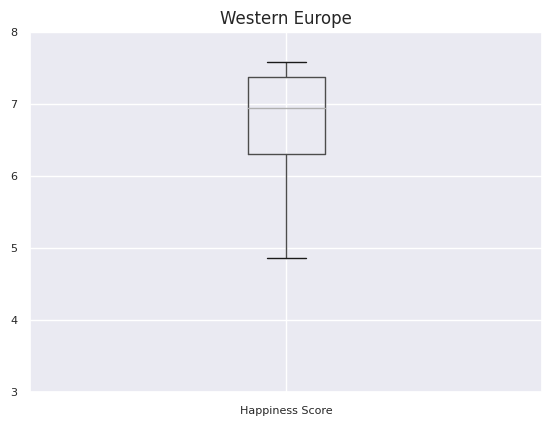

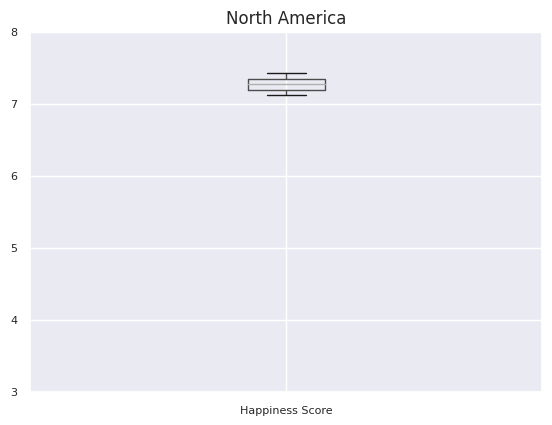

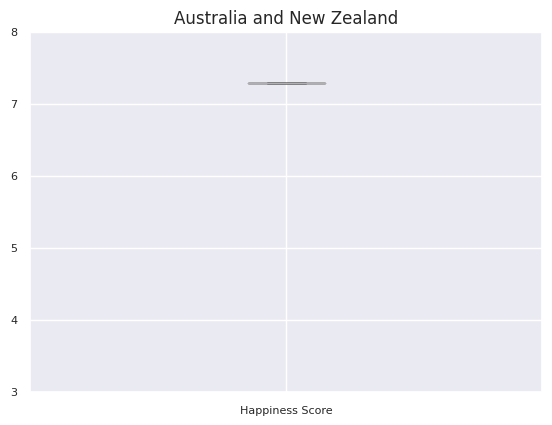

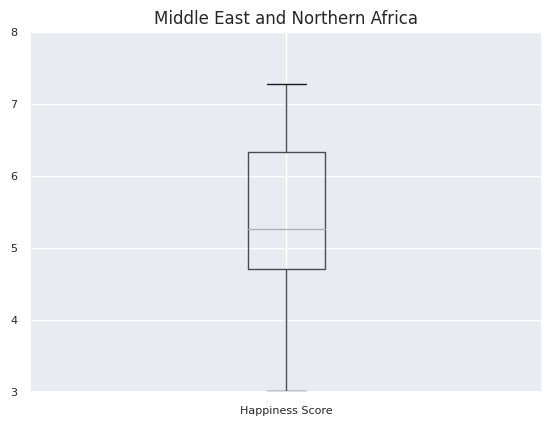

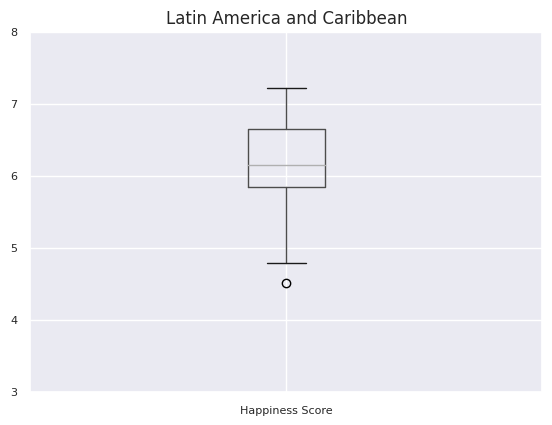

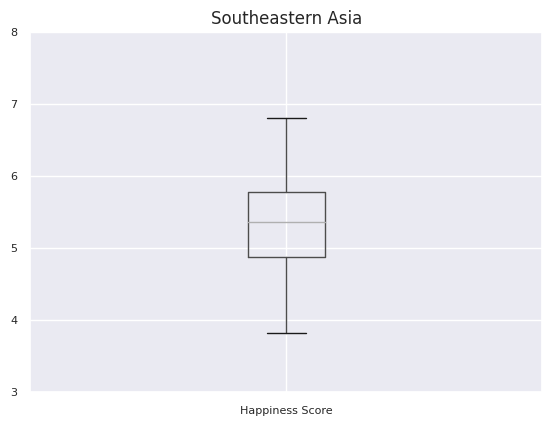

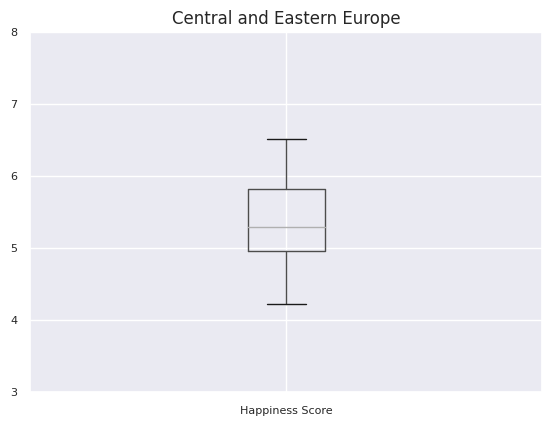

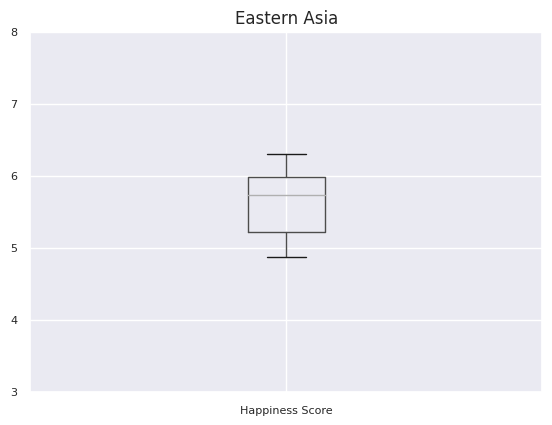

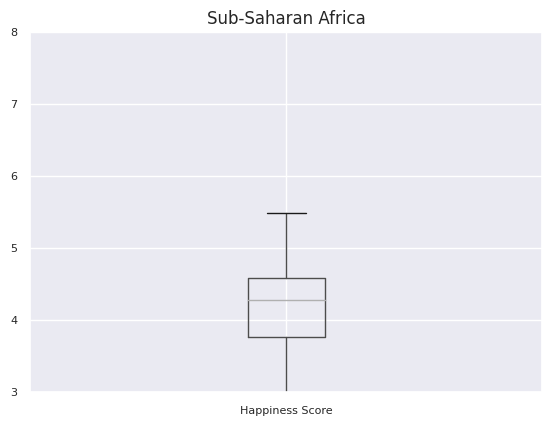

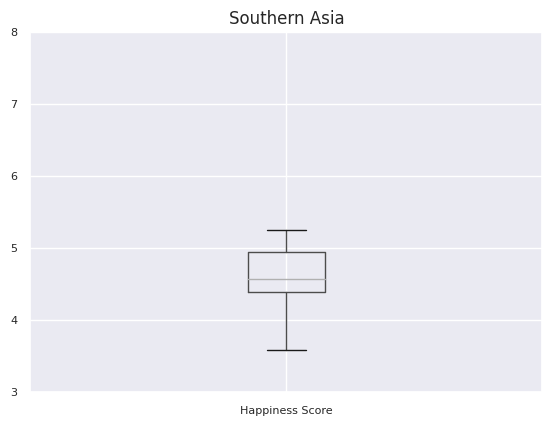

In [169]:
# boxplot of the 2015 dataset
create_boxplot_by_region(df_2015)

For understaing which is the country represented on the Boxplot, I made the following analyze:

In [170]:
df_latin_america = df_2015[df_2015.Region == 'Latin America and Caribbean']
df_latin_america = df_latin_america.sort_values(by=['Happiness Score'], ascending=True)

# getting the lowest happiness score (outlier represented on the boxplot
min_happiness_score_latin_america = df_latin_america['Happiness Score'].min()
country_min_happiness_score_latin_america = df_latin_america[df_latin_america['Happiness Score'] == min_happiness_score_latin_america]['Country']

print('The country outlier on Latin America is: ', country_min_happiness_score_latin_america.to_string())

The country outlier on Latin America is:  118    Haiti


Analyze of 2019:

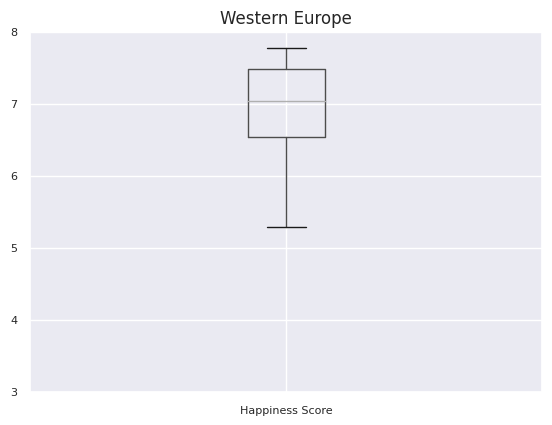

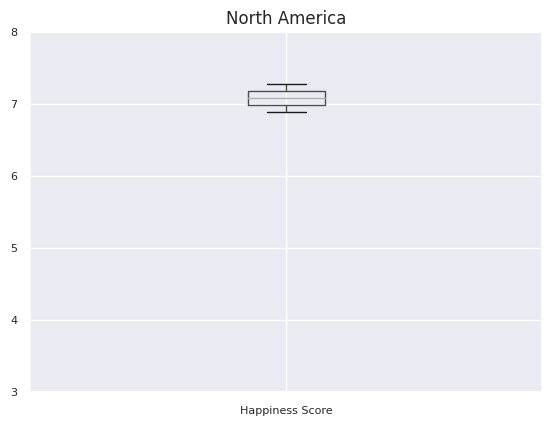

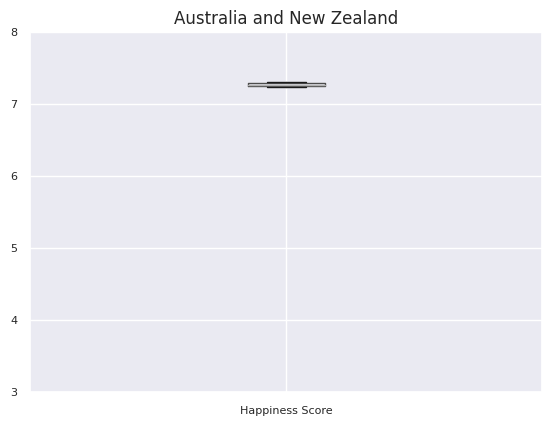

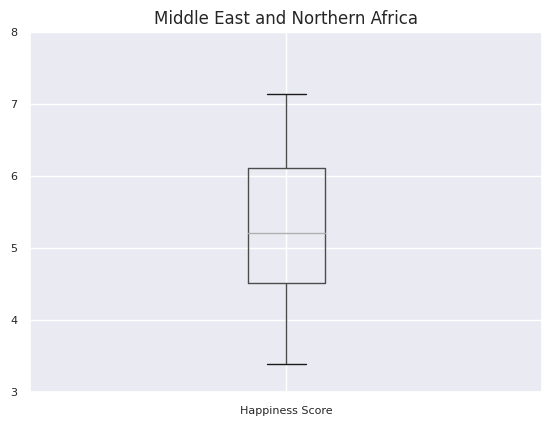

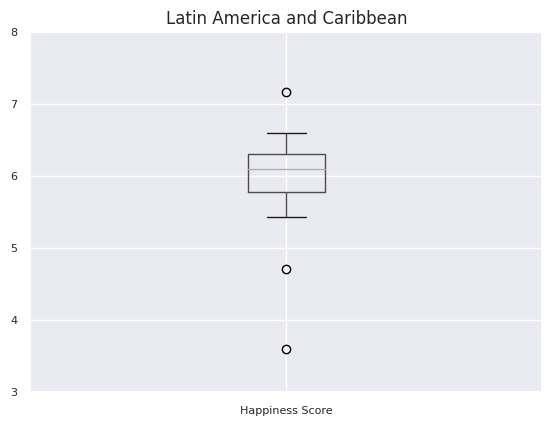

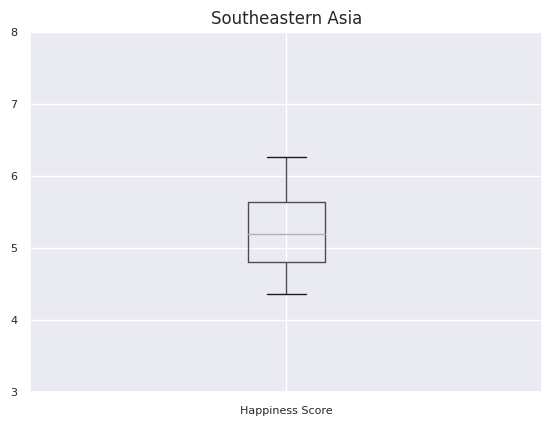

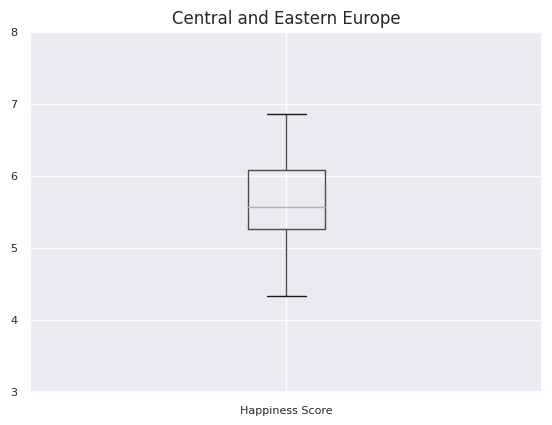

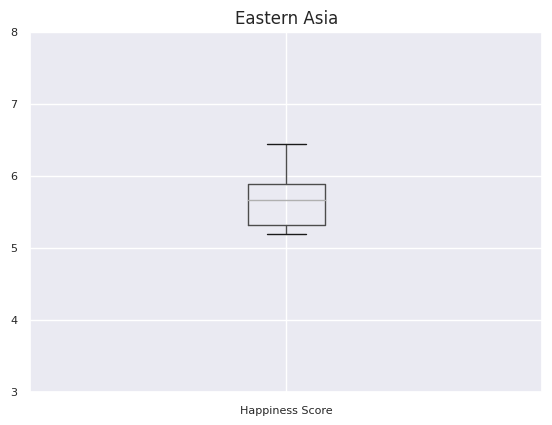

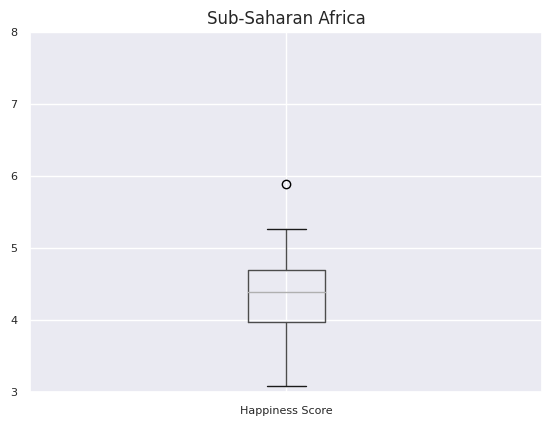

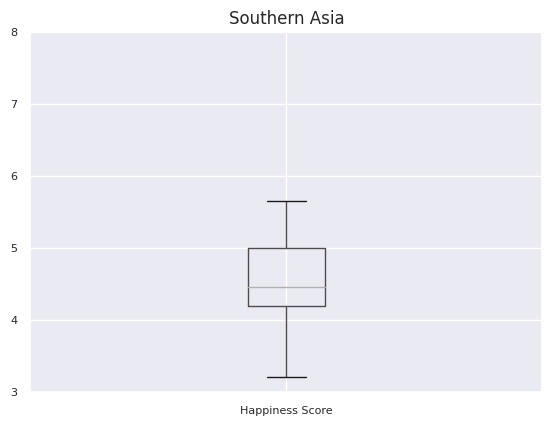

In [171]:
# boxplot of the 2019 dataset
create_boxplot_by_region(df_2019_final)

To understand better the previous result, I wanted to verify which is the country that has less and more score on the Latin American and Sub-Saharan Africa (the outlier represented on the boxplot).

In [172]:
# group by region
df_latin_america_2019 = df_2019_final[df_2019_final.Region == 'Latin America and Caribbean']

# getting the country with the lowest score
df_latin_america_2019 = df_latin_america_2019.sort_values(by=['Happiness Score'], ascending=True)

df_latin_america_2019.head(2)

,Country,Region,Overall rank,Happiness Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
111,Haiti,Latin America and Caribbean,147,3.597,0.323,0.688,0.449,0.026,0.419,0.110
21,Venezuela,Latin America and Caribbean,108,4.707,0.960,1.427,0.805,0.154,0.064,0.047


In [173]:
# getting the country with the biggest score
df_latin_america_2019 = df_latin_america_2019.sort_values(by=['Happiness Score'], ascending=False)

df_latin_america_2019.head(1)

,Country,Region,Overall rank,Happiness Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
11,Costa Rica,Latin America and Caribbean,12,7.167,1.034,1.441,0.963,0.558,0.144,0.093


In [174]:
# group by region
df_sub_saharan_africa_2019 = df_2019_final[df_2019_final.Region == 'Sub-Saharan Africa']
# getting the country with the biggest score
df_sub_saharan_africa_2019 = df_sub_saharan_africa_2019.sort_values(by=['Happiness Score'], ascending=False)

df_sub_saharan_africa_2019.head(1)

,Country,Region,Overall rank,Happiness Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
66,Mauritius,Sub-Saharan Africa,57,5.888,1.12,1.402,0.798,0.498,0.215,0.06


In contrast with the previous plot in 2015, in the year of 2019, we can see that Latin America and the Caribbean, and Sub-Saharan Africa present outliers, the Latin America has two countries with the lowest points on the rank in comparison to the other countries.

In that way, in Latin America, there are two countries with the lowest score: Venezuela and Haiti. In contrast to this, Costa Rica was also a country outlier of Latin America, but with more scores in comparison to the other countries in this continent.

For Sub-Sahran Africa, the country that has more scores in comparison to the others is Mauritius.

### 2. How the Happiness Score is related to the Economy by the continent? (2015 and 2019)

In [177]:
def create_point_graph_by_region(dataframe, x, y):
    # creating the scatter plot
    sns.relplot(data=dataframe, x=x, y=y, hue='Region', aspect=1.61)
    plt.show()

For an analyse that could relate the Happiness and the Economy I created a plot that shows the Economy x Happiness score and paint the plot based on the Region, so it's possible to see the clear concentration of this relation on the countries of Sub-Saharan Africa on the left down of the plot.

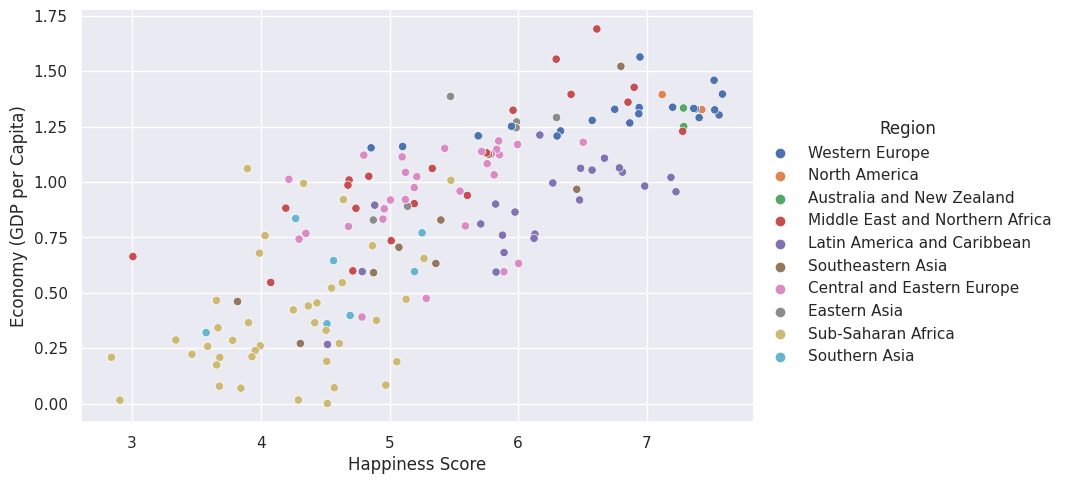

In [178]:
# create scatter plot of 2015
create_point_graph_by_region(df_2015, "Happiness Score", "Economy (GDP per Capita)")

In 2015 is almost possible to see the linear relation between the two components (apart from some outliers), and also possible to notice the concentration of Western Europe on the right top (happier and rich countries) and the concentration of Sub-Saharan Africa on the left bottom (more unhappy and poor countries).

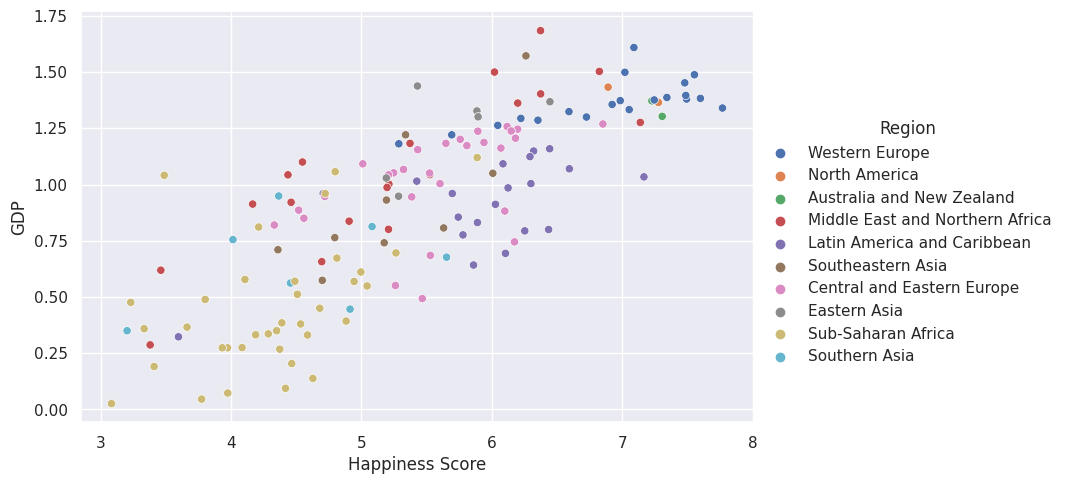

In [179]:
# create scatter plot of 2019
create_point_graph_by_region(df_2019_final, "Happiness Score", "GDP")

It’s possible to see many countries with scores between 3 to 5, more than when we see the graph in 2015. Is also possible to see that the countries in Western Europe had more points over the years. The relation between the Economy and the Happiness Score is still kind of linear. In 2019 is possible to see more countries on the same continent in regions of the graph very similar.



### 3. Which are the aspects that influence the Happiness Score of the countries in 2019?

Another question that I made to myself is if there's a relation between aspects on the dataset with the score, and how much is this correlation between those datas. For this, I created the heatmap to see the relation between the data ana analyse it.

In [180]:
def create_correlation_graph(dataset):
    '''Create a correlation graph of the dataset'''
    sns.heatmap(dataset.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

<ipython-input-180-0e06a26f64ae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


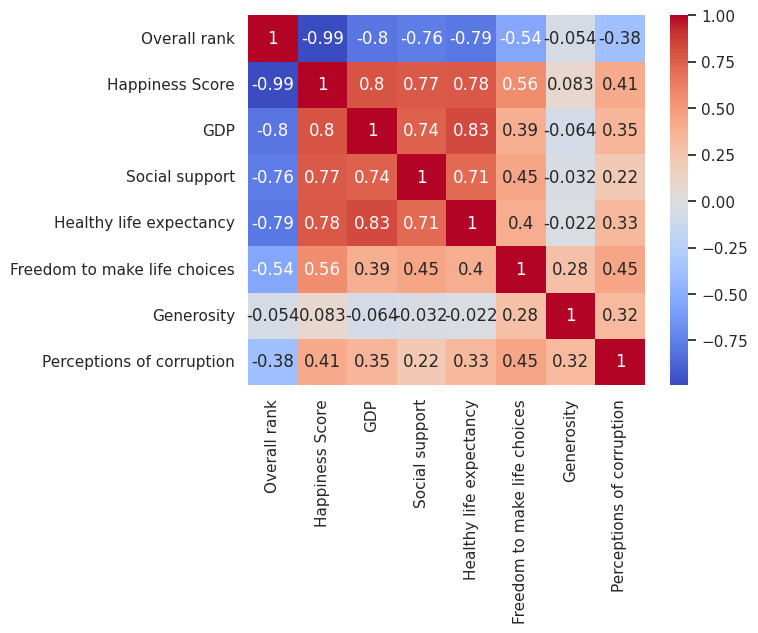

In [181]:
# creating the correlation graph of 2019
create_correlation_graph(df_2019_final)

This graph represent the correlation between the columns of the graph, we can observe that the biggest correlation on the graph is between the *GDP* and the *Happiness Score*, apart of the correlation that is 1. This is something that we can observe on the graph of the previous question, because is a graph that shows almost a linear relation between the two columns.

### 4. Which are the countries with more variation in the Happiness Score cross the years?

In [182]:
def prepare_graph_for_hist(combined_dataframe):
    '''Get the combined dataset and create the hist plot'''
    dataframe = combined_dataframe
    dataframe = dataframe.drop(columns=['Region'])
    
    # rename for graph
    dataframe = dataframe.rename(columns={
        "Happiness_Score_2015": "2015",
        "Happiness_Score_2016": "2016",
        "Happiness_Score_2017": "2017",
        "Happiness_Score_2018": "2018",
        "Happiness_Score_2019": "2019",
    })

    dataframe = dataframe.melt('Country', var_name='Year', value_name='Score')
    return dataframe
    

In [183]:
def create_hist_graph(dataframe):    
    sns.pointplot(data=dataframe, x="Year", y="Score", hue="Country")
    plt.show()

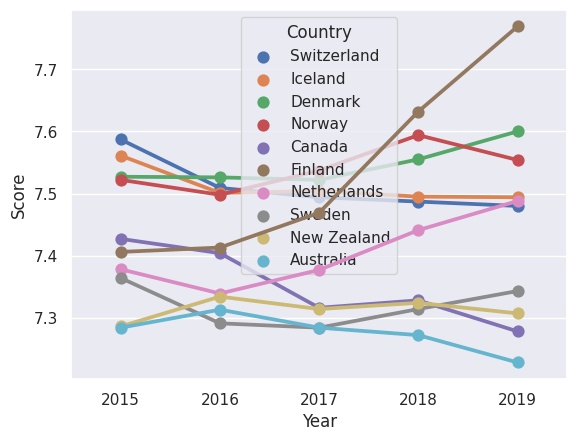

In [184]:
# creating the top 10 graph hist
dataframe_top10 = df_all_combined.iloc[:10]

dataframe_top10 = prepare_graph_for_hist(dataframe_top10)
create_hist_graph(dataframe_top10)

This graph represent the historical growth of the top counties on 2019, this shows the historical score of the countries.

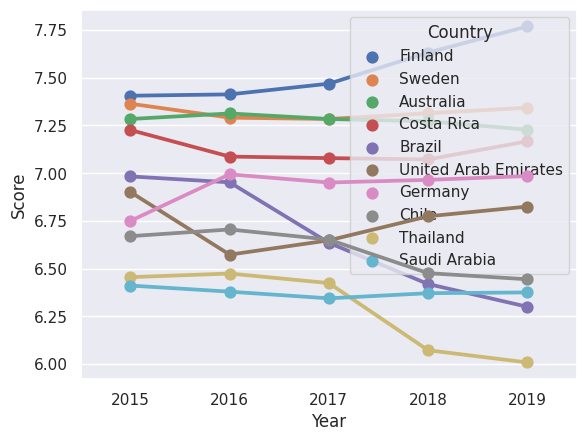

In [185]:
# create dataframe of top 10 variation countries
dataframe_analyse = df_all_combined
dataframe_analyse = prepare_graph_for_hist(dataframe_analyse)

# getting the top 10 growth countries by the score by sum the percentage of variation
dataframe_analyse_10 = dataframe_analyse.groupby(['Country'])['Score'].sum().pct_change().sort_values(ascending=False).iloc[:10]

# getting the values of variation
top_10_growth_countries = dataframe_analyse_10.index.values

# getting the information of happines score by year of the counties
top_10_growth_countries_df = dataframe_analyse.loc[dataframe_analyse['Country'].isin(top_10_growth_countries), :]

# plot the graph
create_hist_graph(top_10_growth_countries_df)

The relation between Happiness Score over the years of the 10 countries with more variation.
